In [37]:
import numpy as np
import pandas as pd
from astropy.stats import sigma_clipped_stats 

In [38]:
from pandas.plotting import scatter_matrix

In [39]:
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFpr

In [40]:
import rfpimp

In [5]:
import seaborn as sns

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
store = pd.HDFStore('ML_dataset_store.hdf5')
store.open()

In [8]:
X = store['X_scaled']
Y = store['Y']

In [9]:
store.close()

In [10]:
np.round(X.values.mean(axis=0))

array([ 0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,
        0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0

In [11]:
np.round(X.values.std(axis=0))

array([0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1.])

In [12]:
selector = VarianceThreshold(0.1)

In [13]:
X_sel = selector.fit_transform(X)

In [14]:
print('Dropped columns:')
list(X.columns[~selector.get_support()])

Dropped columns:


['parent',
 'flags_negative',
 'base_NaiveCentroid_flag_noCounts',
 'base_NaiveCentroid_flag_edge',
 'base_PeakCentroid_flag',
 'base_SdssCentroid_flag_noSecondDerivative',
 'ip_diffim_NaiveDipoleCentroid_flag',
 'base_CircularApertureFlux_flag_badCentroid',
 'base_GaussianFlux_flag_badCentroid',
 'base_NaiveCentroid_flag_badInitialCentroid',
 'base_PeakLikelihoodFlux_flag_badCentroid',
 'base_PsfFlux_flag_badCentroid',
 'base_SdssCentroid_flag_badInitialCentroid',
 'base_SdssShape_flag_badCentroid',
 'slot_Centroid_flag',
 'ip_diffim_NaiveDipoleCentroid_pos_flag',
 'slot_Centroid_pos_flag',
 'ip_diffim_NaiveDipoleCentroid_neg_flag',
 'slot_Centroid_neg_flag',
 'base_SdssShape_flag_psf',
 'base_GaussianFlux_flag_badShape_psf',
 'slot_Shape_flag_psf',
 'base_CircularApertureFlux_3_0_flag',
 'base_CircularApertureFlux_3_0_flag_apertureTruncated',
 'base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated',
 'base_CircularApertureFlux_4_5_flag',
 'base_CircularApertureFlux_4_5_flag_aperture

In [15]:
list(X.columns[selector.get_support()])

['base_NaiveCentroid_x',
 'base_NaiveCentroid_y',
 'base_NaiveCentroid_flag',
 'base_NaiveCentroid_flag_resetToPeak',
 'base_PeakCentroid_x',
 'base_PeakCentroid_y',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_xErr',
 'base_SdssCentroid_yErr',
 'base_SdssCentroid_flag',
 'base_SdssCentroid_flag_edge',
 'base_SdssCentroid_flag_almostNoSecondDerivative',
 'base_SdssCentroid_flag_notAtMaximum',
 'base_SdssCentroid_flag_resetToPeak',
 'ip_diffim_NaiveDipoleCentroid_x',
 'slot_Centroid_x',
 'ip_diffim_NaiveDipoleCentroid_y',
 'slot_Centroid_y',
 'ip_diffim_NaiveDipoleCentroid_neg_x',
 'slot_Centroid_neg_x',
 'ip_diffim_NaiveDipoleCentroid_neg_y',
 'slot_Centroid_neg_y',
 'base_SdssShape_xx',
 'slot_Shape_xx',
 'base_SdssShape_yy',
 'slot_Shape_yy',
 'base_SdssShape_xy',
 'slot_Shape_xy',
 'base_SdssShape_xxErr',
 'slot_Shape_xxErr',
 'base_SdssShape_yyErr',
 'slot_Shape_yyErr',
 'base_SdssShape_xyErr',
 'slot_Shape_xyErr',
 'base_SdssShape_x',
 'slot_Shape_x',
 'base

In [16]:
X_sel.shape

(7782, 174)

In [17]:
X_sel = pd.DataFrame(data=X_sel, columns=list(X.columns[selector.get_support()]))

In [18]:
d = X_sel
corr = d.corr()
# remove corr columns
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)
decorr = d.drop(correlated_features, axis=1)

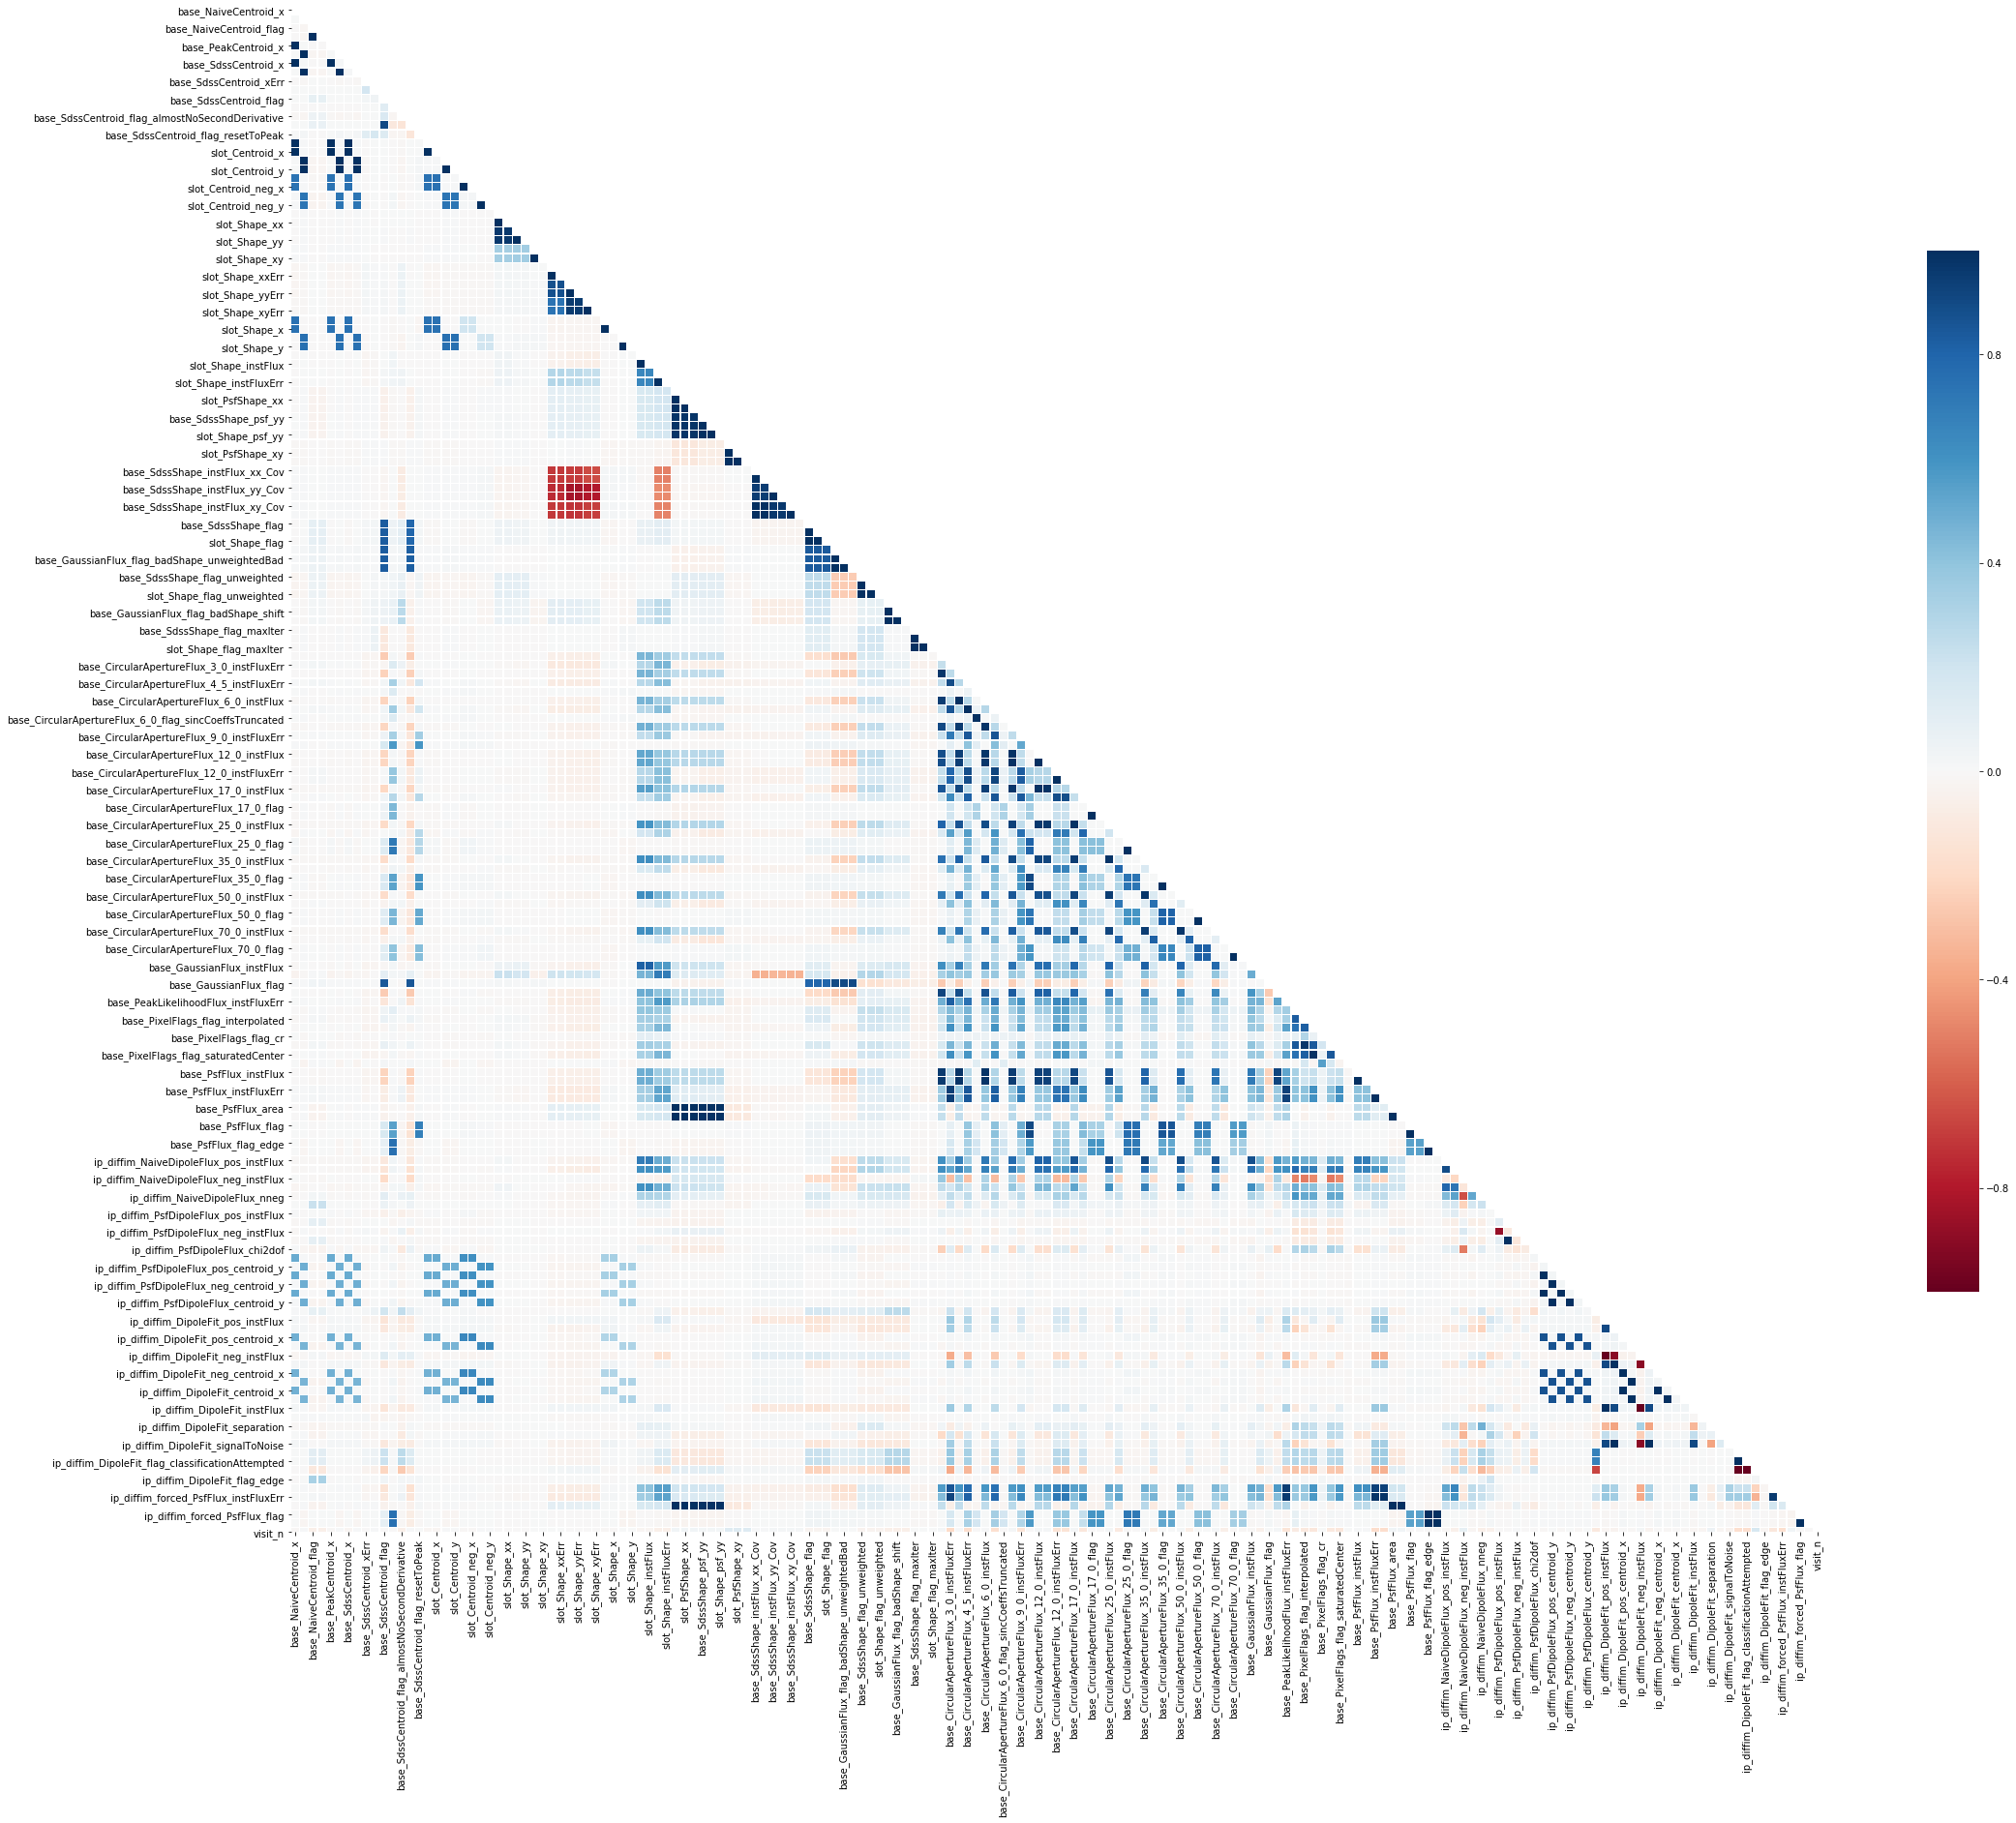

In [23]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(32, 32))

# Draw the heatmap with the mask and correct aspect ratio
corr_plot = sns.heatmap(corr, mask=mask, cmap='RdBu', center=0,
                square=True, linewidths=.2, cbar_kws={"shrink": .5})
plt.tight_layout()

In [24]:
corr = decorr.corr()

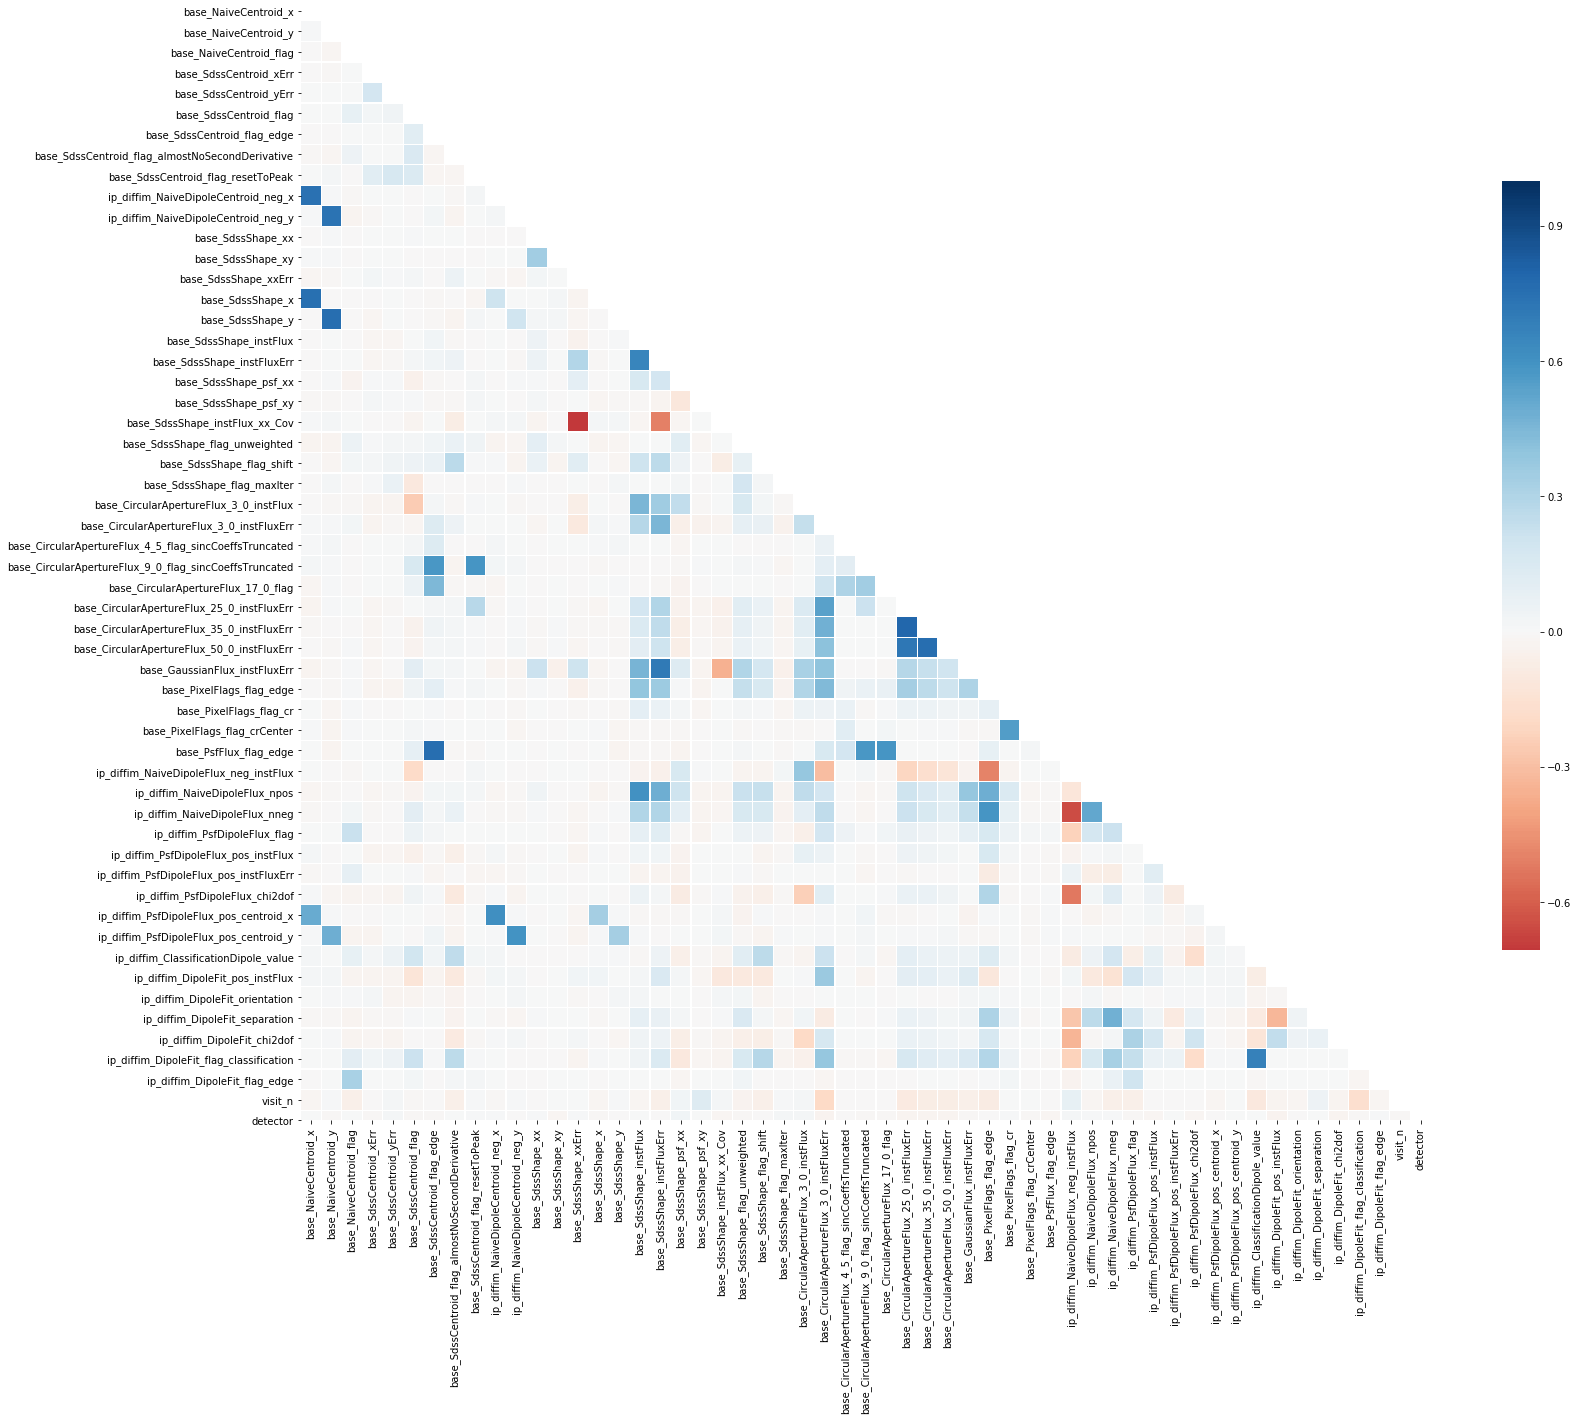

In [26]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(24, 24))

# Draw the heatmap with the mask and correct aspect ratio
corr_plot = sns.heatmap(corr, mask=mask, cmap='RdBu', center=0,
                square=True, linewidths=.2, cbar_kws={"shrink": .5})
plt.tight_layout()

In [32]:
X_sel = decorr

In [33]:
selector = SelectPercentile(mutual_info_classif, percentile=30)
X_new = selector.fit_transform(X_sel, Y)

In [34]:
X_sel = pd.DataFrame(data=X_new, columns=list(X_sel.columns[selector.get_support()]))

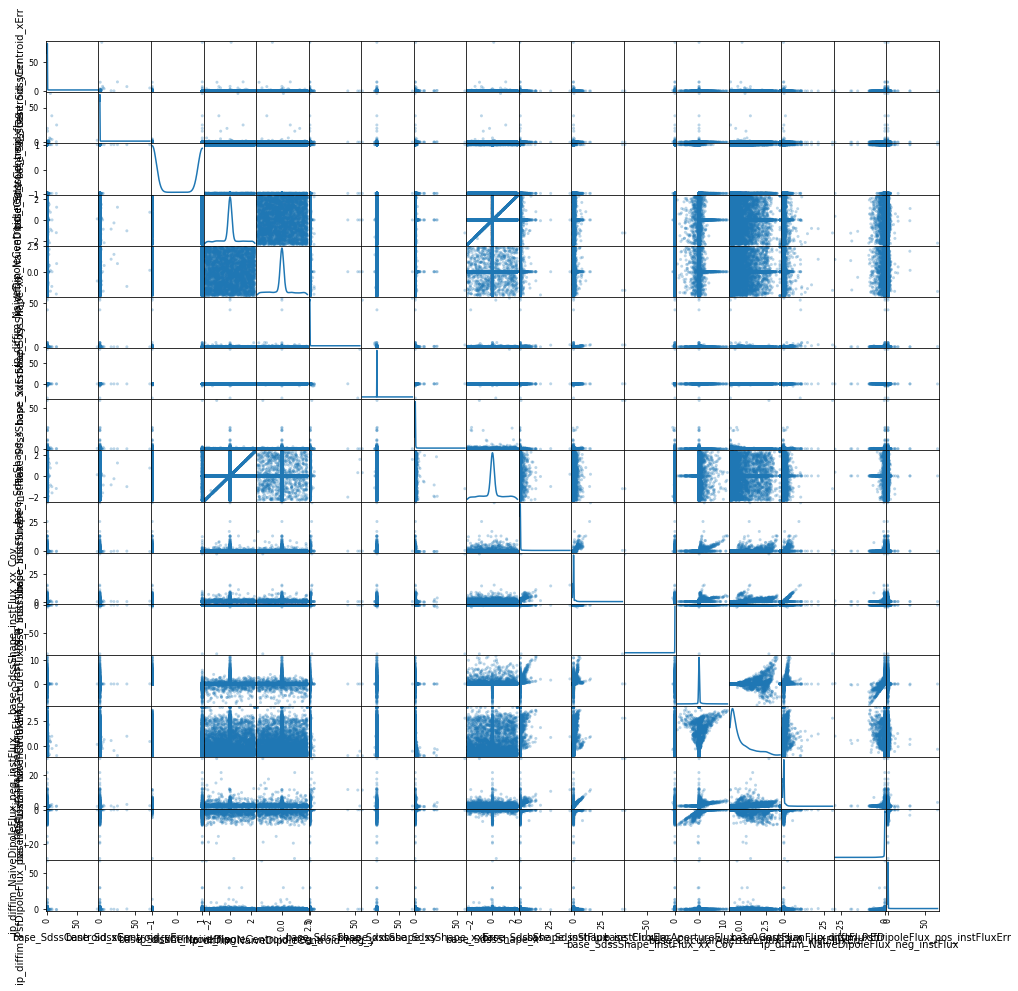

In [41]:
scatter_matrix(X_sel, diagonal='kde', alpha=0.3, figsize=(16, 16))
plt.show()

In [23]:
X_sub = X_sel.sample(frac=0.01)
scatter_matrix(X_sub, diagonal='hist', alpha=0.1, figsize=(12, 12))
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2aaad5b8ec20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x2aaad6049560> (for post_execute):


KeyboardInterrupt: 

In [14]:
pca = PCA(svd_solver='full', whiten=False, n_components=4)

In [15]:
X_decomp = pca.fit_transform(X_sel)

In [16]:
np.sum(pca.explained_variance_ )

58.59749151972056

In [17]:
np.sum(pca.explained_variance_ratio_)

0.3036134686236638

In [18]:
pca.components_.shape

(4, 193)

In [19]:
X_decomp.shape

(636408, 4)

In [38]:
X_pca = pd.DataFrame(X_decomp, columns=['comp_{}'.format(i+1) for i in range(X_decomp.shape[1])])

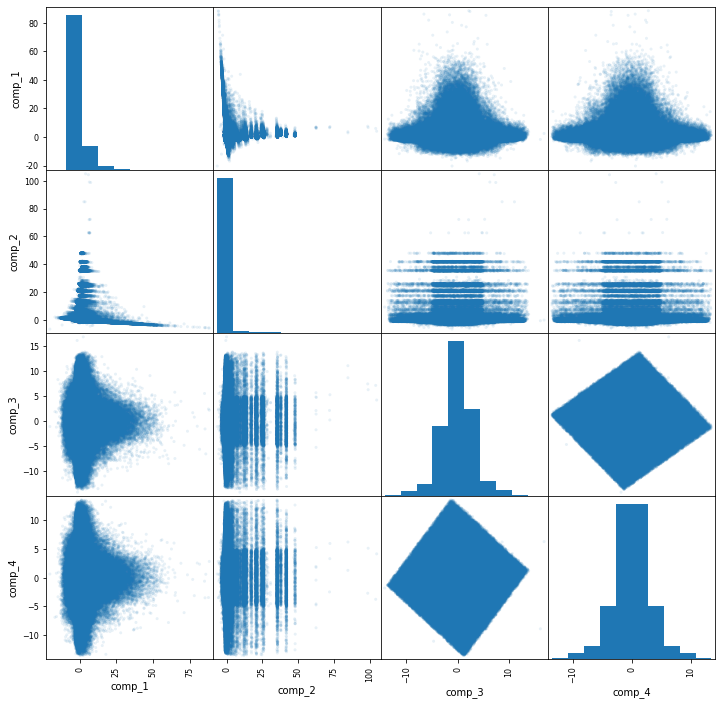

In [39]:
scatter_matrix(X_pca, diagonal='hist', alpha=0.1, figsize=(12, 12))
plt.show()

In [64]:
pca.components_[pca.explained_variance_ratio_>0.02].shape

(14, 199)

In [59]:
X_decomp[:, pca.explained_variance_ratio_>0.02].shape

(636408, 14)